In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install patool
import patoolib
patoolib.extract_archive("drive/My Drive/data.rar", outdir="./")

     |████████████████████████████████| 81kB 2.7MB/s 
patool: Extracting drive/My Drive/data.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/data.rar"
patool:     with cwd='./'
patool: ... drive/My Drive/data.rar extracted to `./'.


'./'

In [0]:
import json
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()  # for plot styling

train_path = "./data/annotations/via_region_data.json"

with open(train_path,"r") as ftr:
    trlabel = json.load(ftr)
    
BBDlabeldict = {"FRONT":0,
             "LEFT":1,
             "RIGHT":2,
             "TOP":3,
             "BOTTOM":4,
             "FRONT LEFT":5,
             "FRONT RIGHT":6,
             "BACK":7,
             "TOP LEFT":8,
             "TOP RIGHT":9,
             "LEFT BOTTOM":10,
             "RIGHT BOTTOM":11,
             "RIGHT BACK":12}

w,h = [] , []
a = list(trlabel.keys())
for ind1 in range(len(trlabel)):
  name = a[ind1]
  w.append(trlabel[name]['regions'][0]['shape_attributes']['width'])
  h.append(trlabel[name]['regions'][0]['shape_attributes']['height'])
  
w=np.asarray(w)
h=np.asarray(h)
     
x=[w,h]
x=np.asarray(x)
x=x.transpose()

In [0]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=13)
kmeans3.fit(x)
y_kmeans3 = kmeans3.predict(x)


centers3 = kmeans3.cluster_centers_

yolo_anchor_average=[]
for ind in range (9):
    yolo_anchor_average.append(np.mean(x[y_kmeans3==ind],axis=0))

yolo_anchor_average=np.array(yolo_anchor_average)


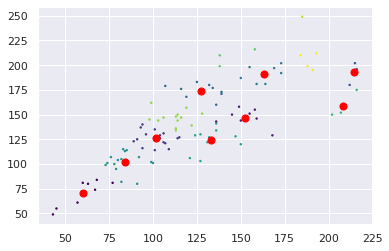

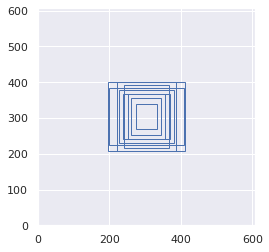

In [0]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=2, cmap='viridis')
plt.scatter(yolo_anchor_average[:, 0], yolo_anchor_average[:, 1], c='red', s=50);
yoloV3anchors = yolo_anchor_average
yoloV3anchors = np.rint(yoloV3anchors)
fig, ax = plt.subplots()
for ind in range(9):
    rectangle= plt.Rectangle((304-yoloV3anchors[ind,0]/2,304-yoloV3anchors[ind,1]/2), yoloV3anchors[ind,0],yoloV3anchors[ind,1] , fc='b',edgecolor='b',fill = None)
    ax.add_patch(rectangle)
ax.set_aspect(1.0)
plt.axis([0,608,0,608])
plt.show()

In [0]:
yoloV3anchors.sort(axis=0)
print("Anchor Boxes are {}".format(yoloV3anchors))

F = open("Generated_Anchor_Boxes.txt", "w")
F.write("{}".format(yoloV3anchors))
F.close() 

Anchor Boxes are [[ 60.  71.]
 [ 84. 102.]
 [102. 124.]
 [127. 126.]
 [133. 147.]
 [152. 159.]
 [163. 174.]
 [208. 191.]
 [214. 193.]]


### Sample annotation

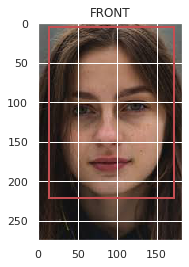

In [0]:
import matplotlib.patches as patches
from PIL import Image
# Create figure and axes
fig,ax = plt.subplots(1)
img = plt.imread('./data/images/image1.jpg')
# Display the image
ax.imshow(img)
rect = patches.Rectangle((trlabel[a[0]]['regions'][0]['shape_attributes']['x'],trlabel[a[0]]['regions'][0]['shape_attributes']['y']),
                           trlabel[a[0]]['regions'][0]['shape_attributes']['width'],
                           trlabel[a[0]]['regions'][0]['shape_attributes']['height'],
                           linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.title(trlabel[a[0]]['regions'][0]['region_attributes']['FACE'])
plt.show()